In [1]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import matplotlib.pyplot as plt

c:\Users\kaira\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [3]:
def get_sentiment_score(comment):
    inputs = tokenizer(comment, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        output = model(**inputs)
    probs = torch.nn.functional.softmax(output.logits, dim=1)
    score = torch.argmax(probs) + 1
    return int(score), float(probs.max())

In [4]:
comments = pd.read_csv(r"C:\Users\kaira\comments.csv")
comments

,id,route_id,username,comment_text,date_time
0,1,1,Сулу Нуржанова,Өте нашар мен бугін остановкада 1сағат тұрдым ...,2019-10-13
1,2,1,Leila,Добрый день! Водителе ну не как уж не вежливые...,2019-09-12
2,3,1,Abubakir Alibaev,Интервал ужас 30-40минут примите меры,2019-03-20
3,4,1,Вася Васильев,Кто запретил останавливаться на Рыскулова посл...,2019-01-14
4,5,5,Диана,Ужасный автобус. просто проехал остановку Сале...,2019-08-21
...,...,...,...,...,...
719,720,396,Аслан Анетов,Востоновите графиг пожалуйста сколько можно ча...,2018-12-24
720,721,396,Игорь,Когда уже восстановите нормальное движение по ...,2018-12-18
721,722,397,Александра Елеонская,NaN,2021-10-31
722,723,402,Михаил,"Не соблюдается график движения, на отрезке мар...",2019-10-17


In [5]:
comments.drop(columns=['date_time','id', 'route_id'], inplace=True)

In [8]:
comments.isnull().sum()

username        0
comment_text    0
dtype: int64

In [7]:
comments.dropna(inplace=True)

In [9]:
sentiments = []
confidences = []


for text in comments['comment_text']:
    score, confidence = get_sentiment_score(text)
    sentiments.append(score)
    confidences.append(round(confidence, 3))

comments["sentiment"] = sentiments
comments["confidence"] = confidences

In [11]:
data = comments.to_excel('comments.xlsx')

In [61]:
comments

,username,comment_text,sentiment,confidence
0,Сулу Нуржанова,Өте нашар мен бугін остановкада 1сағат тұрдым ...,1,0.744
1,Leila,Добрый день! Водителе ну не как уж не вежливые...,4,0.340
2,Abubakir Alibaev,Интервал ужас 30-40минут примите меры,1,0.468
3,Вася Васильев,Кто запретил останавливаться на Рыскулова посл...,1,0.736
4,Диана,Ужасный автобус. просто проехал остановку Сале...,1,0.426
...,...,...,...,...
718,Vladimir Vladimir,"04,04,2019 Сегодня добежала до остановки Джанд...",1,0.726
719,Аслан Анетов,Востоновите графиг пожалуйста сколько можно ча...,1,0.247
720,Игорь,Когда уже восстановите нормальное движение по ...,3,0.301
722,Михаил,"Не соблюдается график движения, на отрезке мар...",1,0.650


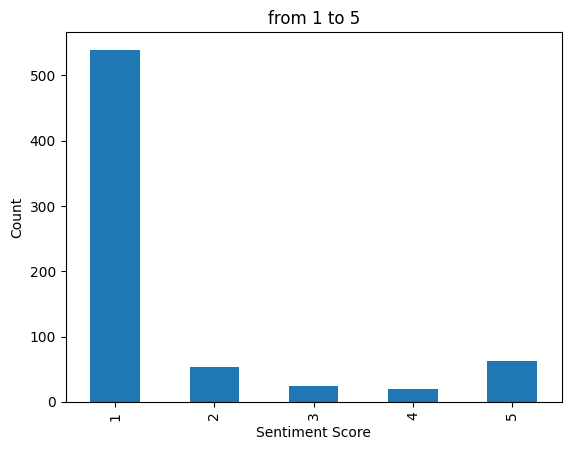

In [12]:
comments['sentiment'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('from 1 to 5')
plt.show()